In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "data.csv"
date_cero = pd.to_datetime(1490195805, unit='s') - pd.to_datetime(1490195805, unit='s')

In [3]:
df = pd.read_csv(data_path)

df['Planned_Delivery_Start_Date'] = pd.to_datetime(df['Planned_Delivery_Start_Date'])
df['Planned_Delivery_End_Date'] = pd.to_datetime(df['Planned_Delivery_End_Date'])
df['Opportunity_Created_Date'] = pd.to_datetime(df['Opportunity_Created_Date'])
df['Last_Modified_Date'] = pd.to_datetime(df['Last_Modified_Date'])

In [4]:
terminados = df[(df['Stage'] == 'Closed Lost') | (df['Stage'] == 'Closed Won')]
reducido = terminados[['Product_Family', 'Pricing, Delivery_Terms_Approved', 'Stage', 'TRF']]

reducido

,Product_Family,"Pricing, Delivery_Terms_Approved",Stage,TRF
0,Product_Family_77,1,Closed Lost,10
1,Product_Family_77,0,Closed Won,0
2,Product_Family_81,0,Closed Won,0
3,Product_Family_209,0,Closed Lost,14
4,Product_Family_209,0,Closed Lost,25
...,...,...,...,...
16942,Product_Family_85,1,Closed Won,0
16943,Product_Family_85,1,Closed Won,0
16944,Product_Family_85,1,Closed Won,0
16945,Product_Family_158,1,Closed Lost,4


In [5]:
familias = reducido.groupby('Product_Family')['TRF'].sum().to_frame()
familias

,TRF
Product_Family,
Product_Family_0,0
Product_Family_1,0
Product_Family_10,0
Product_Family_100,1317
Product_Family_101,7
...,...
Product_Family_95,0
Product_Family_96,0
Product_Family_97,0


In [6]:
top_10_product_family_TRF = familias.sort_values(by='TRF', ascending=False).iloc[0:10].reset_index()
top_10_product_family_TRF.columns = ['Product_Family', 'TRF_Total_Family']
top_10_product_family_TRF

,Product_Family,TRF_Total_Family
0,Product_Family_209,5230
1,Product_Family_164,5103
2,Product_Family_213,5004
3,Product_Family_77,2419
4,Product_Family_170,1739
5,Product_Family_212,1460
6,Product_Family_100,1317
7,Product_Family_208,1262
8,Product_Family_204,1256
9,Product_Family_173,1252


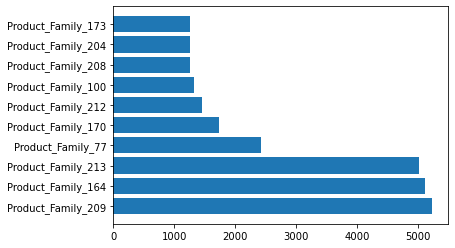

In [7]:
plt.barh(top_10_product_family_TRF['Product_Family'], top_10_product_family_TRF['TRF_Total_Family'])
 
plt.yticks(top_10_product_family_TRF['Product_Family'], top_10_product_family_TRF['Product_Family'])
 
plt.show()

In [8]:
merged = top_10_product_family_TRF.merge(terminados, on='Product_Family')[['Product_Family', 'Stage', 'TRF']]
merged

,Product_Family,Stage,TRF
0,Product_Family_209,Closed Lost,14
1,Product_Family_209,Closed Lost,25
2,Product_Family_209,Closed Lost,28
3,Product_Family_209,Closed Won,2
4,Product_Family_209,Closed Won,1
...,...,...,...
4613,Product_Family_173,Closed Won,0
4614,Product_Family_173,Closed Won,0
4615,Product_Family_173,Closed Won,1
4616,Product_Family_173,Closed Lost,0


In [9]:
familias_aprobadas = reducido.groupby('Product_Family')['Pricing, Delivery_Terms_Approved'].sum().to_frame()
familias_aprobadas

,"Pricing, Delivery_Terms_Approved"
Product_Family,
Product_Family_0,98
Product_Family_1,9
Product_Family_10,76
Product_Family_100,345
Product_Family_101,8
...,...
Product_Family_95,23
Product_Family_96,2
Product_Family_97,7


In [10]:
top_10_product_family_aprobadas = familias_aprobadas.sort_values(by='Pricing, Delivery_Terms_Approved', ascending=False).iloc[0:10].reset_index()
top_10_product_family_aprobadas

,Product_Family,"Pricing, Delivery_Terms_Approved"
0,Product_Family_77,728
1,Product_Family_133,666
2,Product_Family_132,453
3,Product_Family_115,392
4,Product_Family_85,376
5,Product_Family_226,355
6,Product_Family_100,345
7,Product_Family_4,310
8,Product_Family_212,291
9,Product_Family_230,282


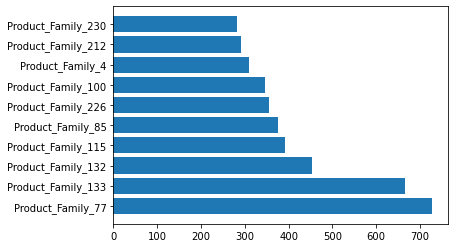

In [11]:
plt.barh(top_10_product_family_aprobadas['Product_Family'], top_10_product_family_aprobadas['Pricing, Delivery_Terms_Approved'])
 
plt.yticks(top_10_product_family_aprobadas['Product_Family'], top_10_product_family_aprobadas['Product_Family'])
 
plt.show()

In [12]:
top_10_oportunidades_anio = df.groupby(['Opportunity_ID', 'Opportunity_Created_Date']).agg({'TRF':'count'})\
.sort_values(by='TRF', ascending=False).iloc[0:10].reset_index()
top_10_oportunidades_anio.columns = ['Opportunity_ID', 'Opportunity_Created_Date', 'Count']
top_10_oportunidades_anio

,Opportunity_ID,Opportunity_Created_Date,Count
0,12460,2015-05-06,36
1,2008,2016-07-11,36
2,6606,2017-11-14,26
3,5123,2017-06-12,26
4,2911,2016-10-29,24
5,767,2017-02-11,18
6,7568,2018-01-30,16
7,4568,2017-09-07,16
8,6654,2017-11-15,16
9,6653,2017-11-15,16
